In [7]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
np.unique(iris_Y)

array([0, 1, 2])

In [8]:
# second lab starts here
#comparing 3 classifiers 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5)
svc = SVC(kernel="linear", C=0.025)
myClassifiers = [knn, dt, svc]

In [15]:
from sklearn.cross_validation import cross_val_score
evaluation_results = []
evaluation_means = []
for c in myClassifiers:
    c.fit(iris_X, iris_Y)
    cv_scores = cross_val_score(c, iris_X, iris_Y, scoring='accuracy')
    print(cv_scores)
    evaluation_results.append(cv_scores)
    cv_mean = cv_scores.mean()
    print(cv_mean)
    evaluation_means.append(cv_mean)

[ 0.98039216  0.98039216  1.        ]
0.986928104575
[ 0.98039216  0.92156863  0.97916667]
0.960375816993
[ 0.94117647  0.88235294  0.97916667]
0.934232026144


([<matplotlib.axis.XTick at 0x7f484c0c2b38>,
 <a list of 3 Text xticklabel objects>)

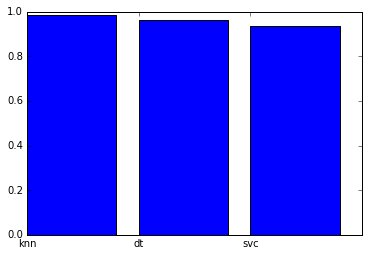

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting classifiers evalution results
#plt.figure(figsize=(15,5))
x_axis = ['knn', 'dt', 'svc']
y_axis = evaluation_means
ind = np.arange(len(x_axis))
plt.bar(ind, y_axis)
plt.xticks(ind, x_axis)

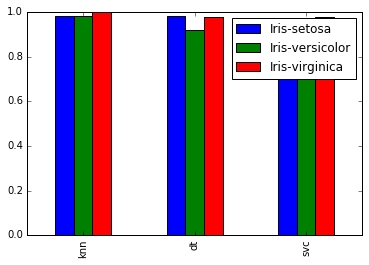

In [32]:
import pandas as pd
df2 = pd.DataFrame(evaluation_results, index=x_axis, columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
df2.plot.bar()